In [43]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [44]:
# Upload dataset
gym_data = pd.read_csv('./Data/gym_members_exercise_tracking_synthetic_data.csv')

## Select colomn we want to keep
gym_col_to_keep = ['Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
df_gym = gym_data[gym_col_to_keep].copy()

In [45]:
# Data cleaning
missing_values = df_gym.isnull().sum()
print("Missing values in each columns :")
print(missing_values)

Missing values in each columns :
Age                              10
Weight (kg)                      22
Height (m)                       26
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


In [46]:
## Replace missing value
for col in gym_col_to_keep:
    df_gym[col] = df_gym[col].fillna(df_gym[col].median())

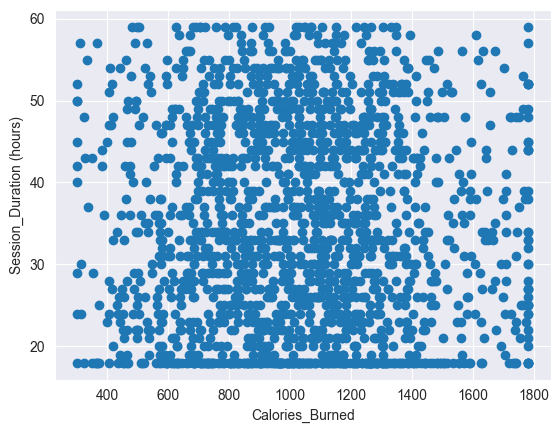

In [47]:
## This task will be unsupervised learning.
## Determinig K by visualization

## plot my two input columns
plt.scatter(df_gym.Calories_Burned, df_gym['Age'])
plt.xlabel('Calories_Burned')
plt.ylabel('Session_Duration (hours)')
plt.show()